## **Description:**
Complications of pregnancy are health problems that occur during pregnancy. They can involve
the mother’s health ,the baby’s health or both .Some women have health problems that arise
during pregnancy , and other women have health problems before they become pregnant that
could lead to complications . It is very important for the women to receive healthcare before and
during pregnancy to decrease the risk of pregnancy complications. Sometimes it is difficult for a
woman to determine which symptoms are normal and which are not.

# **STEP 0:**
# Import libraries and Dataset
Dataset:Maternal Health Risk Data Set.csv

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

# **STEP 1: Data Collection**
Analysis of Maternal Health Risk of pregnant Patient

In [2]:
#loading the maternal Health Risk of pregnant Patients
df=pd.read_csv('C:/Users/shubhangi vajpai/Downloads/Maternal Health Risk Data Set (1).csv')
print(f"Dimensions: {df.shape}")
df.head()

Dimensions: (1014, 7)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
df["RiskLevel"].replace({"high risk":"3","mid risk":"2","low risk":"1"},inplace=True)
df["RiskLevel"]=df["RiskLevel"].astype(float)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


# **Descriptive Statistics**

In [4]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


In [5]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,1.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,1.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,1.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,2.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,3.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,3.000000


#  **STEP 2: DATA VISUALIZATION**

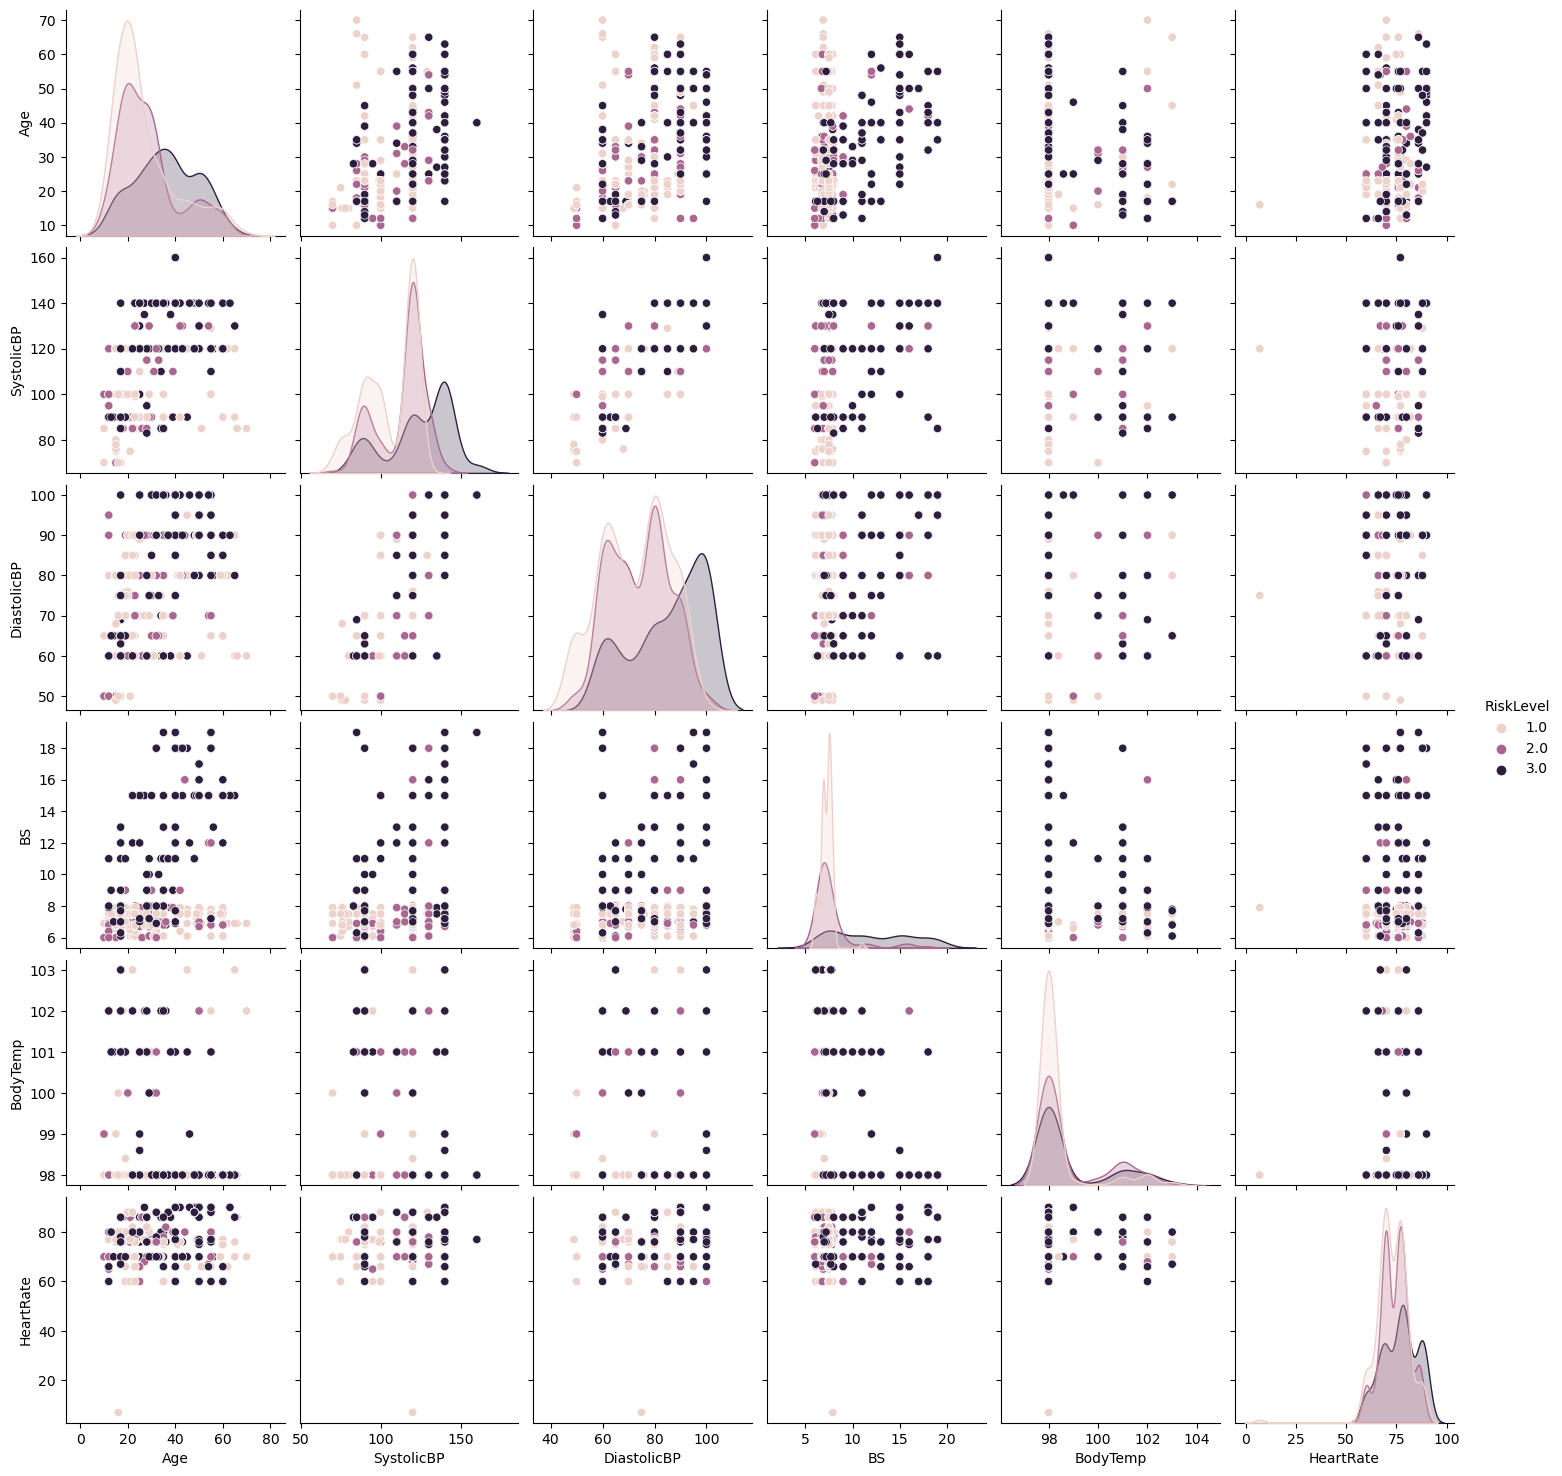

In [6]:
sns.pairplot(df, hue="RiskLevel")
plt.show()

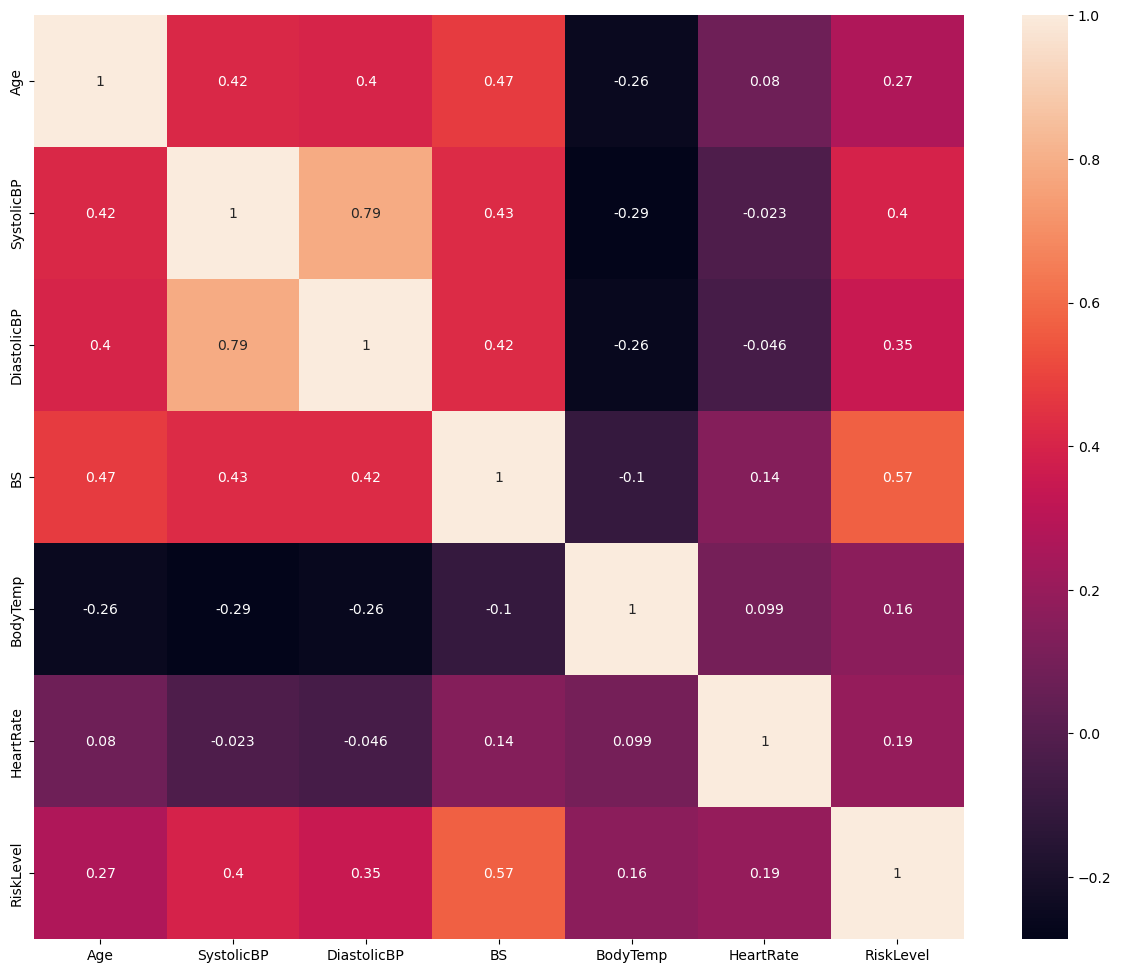

In [7]:
#heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [8]:
print("Missing values:")
print(df.isna().sum())

Missing values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [9]:
df.RiskLevel.value_counts()

1.0    406
2.0    336
3.0    272
Name: RiskLevel, dtype: int64

**VISUALIZE THE TRENDS AND PATTERN IN DATA**

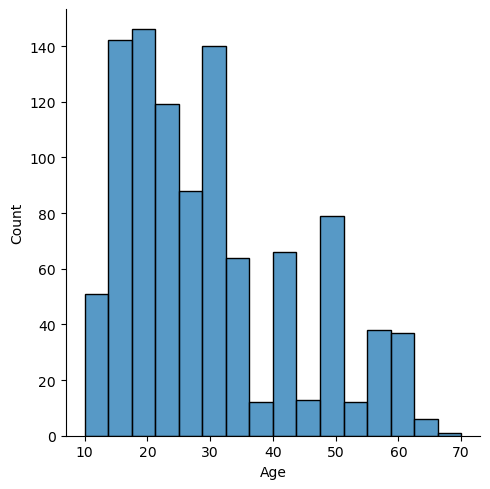

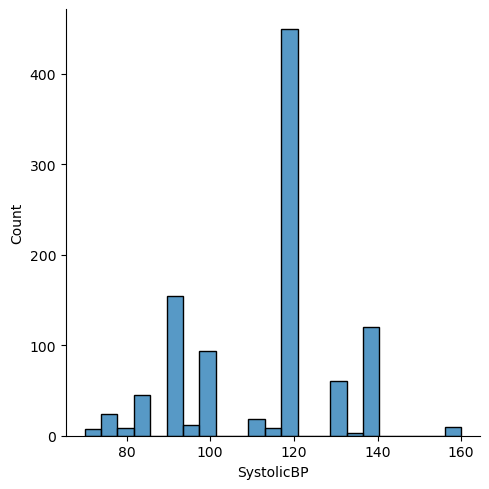

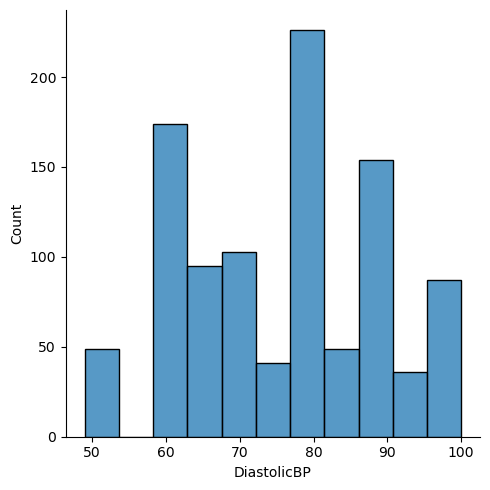

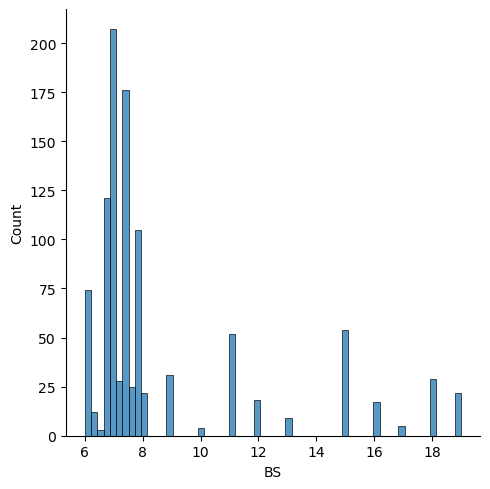

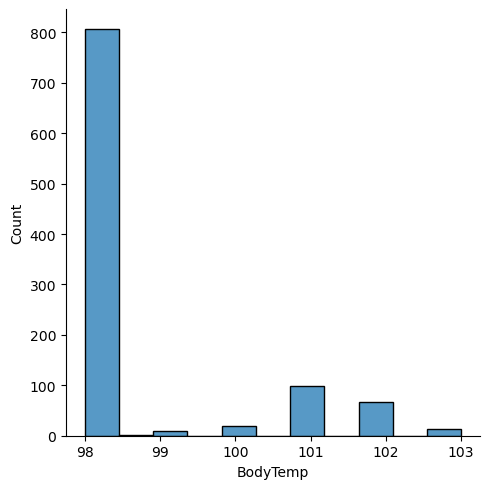

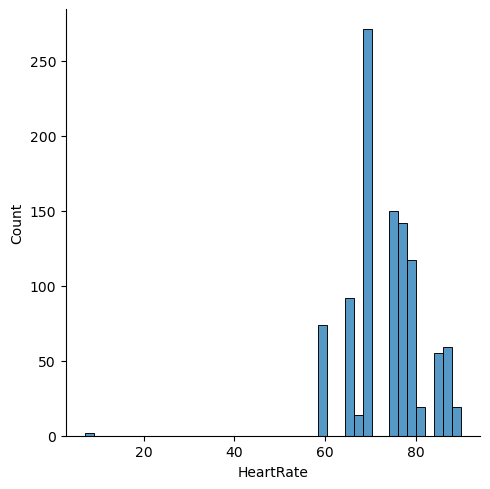

In [10]:
for column in df.columns[:6]:
  sns.displot(df[column])
  plt.show()

In [11]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel      float64
dtype: object

# **STEP 3: Data Preprocessing**

SPLITTING DATASET FOR TRAINING AND TESTING

In [12]:

train,test=train_test_split(df,test_size=0.2,random_state=25)
print(f"No of training Examples {train.shape[0]}")
print(f"No of testing Examples {test.shape[0]}")

No of training Examples 811
No of testing Examples 203


In [13]:
y_test=test["RiskLevel"]
x_test=test.drop("RiskLevel",axis=1)
x_test.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
805,19,120,80,7.0,98.0,70
298,23,90,60,7.7,98.0,76
243,32,120,65,6.0,101.0,76
262,40,160,100,19.0,98.0,77
61,15,80,60,7.0,98.0,80


In [14]:
#Setting training data into x_train and y train
x_train=train.drop('RiskLevel',axis=1)
y_train=train['RiskLevel']
#Shapes of x_train,y_train and test data
x_train.shape,y_train.shape,x_test.shape


((811, 6), (811,), (203, 6))

## **STEP 5: DATA MODELLING AND TESTING**

LINEAR REGRESSION MODELLING AND TRAINING

In [15]:
#linear regression modelling and training
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
print(linear_model.score(x_train,y_train))

#testing the model and desplaying the output
linear_predict=linear_model.predict(x_test)
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':linear_predict,'Actual Risk':y_test})
print(linear_result)


0.42981295732825187
      Id  Predicted Risk  Actual Risk
805  805        1.638303          2.0
298  298        1.373207          1.0
243  243        2.069178          2.0
262  262        3.537608          3.0
61    61        1.211733          1.0
..   ...             ...          ...
550  550        2.166531          2.0
578  578        2.221913          3.0
698  698        1.139537          1.0
231  231        2.013650          3.0
505  505        1.085635          1.0

[203 rows x 3 columns]


RANDOM FOREST REGRESSION

In [16]:
#random forest Regression
random_model=RandomForestRegressor(n_estimators=50)
random_model.fit(x_train,y_train)
print(random_model.score(x_train,y_train))

#taking predcition on test set
random_predict=random_model.predict(x_test)
random_result=pd.DataFrame({'Id':test.index,'Predicted Risk':random_predict,'Actual Risk':y_test})
print(random_result)

print("Train accuracy:",random_model.score(x_train,y_train))
print("Test accuracy:",random_model.score(x_test,y_test))

0.8961257887661495
      Id  Predicted Risk  Actual Risk
805  805        1.823207          2.0
298  298        1.000000          1.0
243  243        1.980000          2.0
262  262        3.000000          3.0
61    61        1.138182          1.0
..   ...             ...          ...
550  550        2.871846          2.0
578  578        2.340102          3.0
698  698        1.078182          1.0
231  231        3.000000          3.0
505  505        1.000000          1.0

[203 rows x 3 columns]
Train accuracy: 0.8961257887661495
Test accuracy: 0.7478518935642193


# **Step 5: Model Evaluation**
Applying different Algorithm for best Accuracy

In [17]:
#decision Tree
decision_tree=DecisionTreeClassifier(criterion="gini")

decision_tree.fit(x_train,y_train)
print(decision_tree.score(x_train,y_train))

#making prediction on test set
decision_predict=decision_tree.predict(x_test)
decision_result=pd.DataFrame({'Id':test.index,'Predicted Risk':decision_predict,'Actual Risk':y_test})
print(decision_result)

print("Train accuracy:",decision_tree.score(x_train,y_train))
print("Test accuracy:",decision_tree.score(x_test,y_test))

0.9321824907521579
      Id  Predicted Risk  Actual Risk
805  805             2.0          2.0
298  298             1.0          1.0
243  243             2.0          2.0
262  262             3.0          3.0
61    61             1.0          1.0
..   ...             ...          ...
550  550             3.0          2.0
578  578             3.0          3.0
698  698             1.0          1.0
231  231             3.0          3.0
505  505             1.0          1.0

[203 rows x 3 columns]
Train accuracy: 0.9321824907521579
Test accuracy: 0.7931034482758621


MAKING A PREDICTIVE MODEL

In [22]:
import pandas as pd
from xgboost import XGBClassifier

# Assuming y_train is a pandas Series
y_train = y_train - 1

xgb_clf = XGBClassifier()
xgb_clf = xgb_clf.fit(x_train, y_train)
print(xgb_clf.score(x_train, y_train))

# Making prediction on the test set
xgb_predict = xgb_clf.predict(x_test)

xgb_result = pd.DataFrame({'Id': test.index, 'Predicted Risk': xgb_predict, 'Actual Risk': y_test})
print(xgb_result)

print("Train accuracy:", xgb_clf.score(x_train, y_train))
print("Test accuracy:", xgb_clf.score(x_test, y_test))



ModuleNotFoundError: No module named 'xgboost'

In [18]:
def predict_patient_risk():
    print("---------------------------------")
    print("       DecisionTreeClassifier")
    print("Level of Risk:1-3 low->1,mid->2, high->3")
    print("__________________________________")

    inpFrame = ['Enter Age of Patient:', 'Enter systolic Blood Pressure of Patient:',
                'Enter Diastolic Blood Pressuree of Patient:', 'Enter Blood Glucose Level of Patient:',
                'Enter Body Temperarature of  Patient:', 'Enter Heart Rateof Patient:']

    inpArray = list()

    for i in range(6):
        while True:
            temp = input(inpFrame[i])
            if temp.strip():
                try:
                    inpArray.append(float(temp))
                    break  # Exit the loop if conversion is successful
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")
            else:
                print("Input cannot be empty.")

    patientPredict = decision_tree.predict([inpArray])
    print("________________________________________")

    if patientPredict[0] == 1.0:
        print("Risk Level of patient is Low:", patientPredict[0])
        print("PATIENT IS HEALTHY")
    elif patientPredict[0] == 2.0:
        print("Risk Level of patient is Medium:", patientPredict[0])
        print("Need to take rest and Precautions.")
    elif patientPredict[0] == 3.0:
        print("Risk Level of patient is High:", patientPredict[0])
        print("CONSULT THE DOCTOR")

    print('-----------------------------------------')

# Call the function to make predictions
predict_patient_risk()


---------------------------------
       DecisionTreeClassifier
Level of Risk:1-3 low->1,mid->2, high->3
__________________________________
________________________________________
Risk Level of patient is High: 3.0
CONSULT THE DOCTOR
-----------------------------------------


Saving The Trained Model


In [19]:
import pickle

In [21]:
filename = "trained_model1.sav"
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the 'loaded_model' to make predictions or perform other tasks


# **STEP 6:Deployement of Model**

Loading the Saved Model

In [22]:
loaded_model=pickle.load(open('trained_model1.sav','rb'))

In [23]:
print("---------------------------------")
print("       DecisionTreeClassifier")
print("Level of Risk:1-3   low->1,high->3")
print("__________________________________")
inpFrame=['Enter Age of Patient:','Enter systolic Blood Pressure of Patient:','Enter Diastolic Blood Pressuree of Patient:','Enter Blood Glucose Level of Patient:','Enter Body Temperarature of  Patient:','Enter Heart Rateof Patient:',]
inpArray=list()
for i in  range(6):
  temp=input(inpFrame[i])
  inpArray.append(float(temp))

patientPredict=loaded_model.predict([inpArray])
print("________________________________________")
if patientPredict[0]==1.0:
  print("Risk Level of patient is Low:",patientPredict[0])
  print("NO ACTIVE COMPLICATIONS PATIENT IS HEALTHY")
elif patientPredict[0]==2.0:
  print("Risk Level of patient is Medium:",patientPredict[0])
  print("Need to take Precautions")
elif  patientPredict[0]==3.0:
  print("Risk Level of patient is High:",patientPredict[0])
  print("HIGH RISK OF COMPLICATIONS CONSULT THE DOCTOR")
print('-----------------------------------------')

---------------------------------
       DecisionTreeClassifier
Level of Risk:1-3   low->1,high->3
__________________________________
________________________________________
Risk Level of patient is High: 3.0
HIGH RISK OF COMPLICATIONS CONSULT THE DOCTOR
-----------------------------------------
